# Why Convolutional Neural Networks 

* Densely connected layers learn global patterns from their input feature space
* Convolution layers learn local patterns 

* The patterns they learn are transational invariant 
> Like the pattern they might learn from the lower right half of an image, same they ll be able to recognize from another corner in another image. Dense would have to learn both, making conv nets data efficient. Visual world is fundamentally transational invaraiant
* Can learn spatial hierarchies of patterns 
> First layer might learn eyes, ears, nose. Second will learn the in depth and intricate features of each part and so on. Allowing convnets to learn increasingly complex and abstract features. World is inherently spatially hierarchial.

* 3D Tensors -> Feature Maps
* Two Spatial axes (width and height) and one Depth Axis (color channel)
* Convolution operation extracts patches from input feature and applies same transformation to all of these patches -> output feature map
* The output feature maps depth no longer stands for the color channels rather stand for _Filters_
* Filters encode specific aspects of the input data at a high level -> " presenece of a face in the input "
* (28, 28 ,1) ---> (26, 26, 32) = Went from a feature map of size (28, 28, 1) to a feature map of size (26, 26, 32)
* Each of the 32 output channels contains a 26x26 grid of values. Each of them are a response map of the filter over that input.
* So every dimension in the depth map (32) is a feature (or a filter)
* A filter map at depth "n" -> [:, :, n]

* Keras Conv2d -> (output depth, (window_height, window_width))
* A window slides over the input feature map to produce a 1D Tensor of shape (depth,) which is then spatially patched together into a 3D output map of shape (height, width, output_depth)
* Padding - Adds an extra approximate same number of rows and columns to either side to preserve spatial dimension
* Stride - Distance between two succesive windows over which the filter goes on the input matrix. Normally its 1, higher stride values downsample the feature map.
* Max Pooling - Downsamples feature maps. Instead of locally transforming the patches via a learned linear transformation like convolution they are transformed via a hardcoded max tensor operation. Usually 2x2 windows stride 2
* Conv2d usually 3x3 window stride 1
* We downsample the feature maps to reduce the number of parameters and spatial hierachies and patterns the successive layers or final dense layers would have to learn for each class or feature. 

# Dataset Prepration

In [2]:
#Dataset taken from https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza

import os, shutil

print("Number of pizza images are ", len(os.listdir("pizza_not_pizza\\pizza")))
print("Number of not pizza images are ", len(os.listdir("pizza_not_pizza\\not_pizza")))

Number of pizza images are  983
Number of not pizza images are  983


In [3]:
#Creating train, val, test dataset

original_dataset_dir = "pizza_not_pizza"
base_dir = "dataset"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

val_dir = os.path.join(base_dir, "val")
os.mkdir(val_dir)

train_pizza_images_dir = os.path.join(train_dir, "pizza")
os.mkdir(train_pizza_images_dir)
train_not_pizza_images_dir = os.path.join(train_dir, "not_pizza")
os.mkdir(train_not_pizza_images_dir)

test_pizza_images_dir = os.path.join(test_dir, "pizza")
os.mkdir(test_pizza_images_dir)
test_not_pizza_images_dir = os.path.join(test_dir, "not_pizza")
os.mkdir(test_not_pizza_images_dir)

val_pizza_images_dir = os.path.join(val_dir, "pizza")
os.mkdir(val_pizza_images_dir)
val_not_pizza_images_dir = os.path.join(val_dir, "not_pizza")
os.mkdir(val_not_pizza_images_dir)

In [3]:
from tqdm.notebook import tqdm
import random

pizza_images_list = os.listdir("pizza_not_pizza\\pizza")
random.shuffle(pizza_images_list)
not_pizza_images_list = os.listdir("pizza_not_pizza\\not_pizza")
random.shuffle(not_pizza_images_list)

train_len = 500
val_len = 800
test_len = 983

In [5]:
for index, file in tqdm(enumerate(pizza_images_list)):
    if(index < train_len):
        dest_dir = os.path.join(train_pizza_images_dir, file)
        source_dir = os.path.join(original_dataset_dir, "pizza", file)
        shutil.copy(source_dir, dest_dir)

    elif(index >= train_len and index < val_len):
        dest_dir = os.path.join(val_pizza_images_dir, file)
        source_dir = os.path.join(original_dataset_dir, "pizza", file)
        shutil.copy(source_dir, dest_dir)

    elif(index >= val_len and index < test_len):
        dest_dir = os.path.join(test_pizza_images_dir, file)
        source_dir = os.path.join(original_dataset_dir, "pizza", file)  
        shutil.copy(source_dir, dest_dir)

print("Training Pizza Images are ", len(os.listdir(train_pizza_images_dir)))
print("Testing pizza images are", len(os.listdir(test_pizza_images_dir)))
print("Validation pizza images are", len(os.listdir(val_pizza_images_dir)))

0it [00:00, ?it/s]

Training Pizza Images are  500
Testing pizza images are 183
Validation pizza images are 300


In [8]:
for index, file in tqdm(enumerate(not_pizza_images_list)):
    if(index < train_len):
        dest_dir = os.path.join(train_not_pizza_images_dir, file)
        source_dir = os.path.join(original_dataset_dir, "not_pizza", file)
        shutil.copy(source_dir, dest_dir)

    elif(index >= train_len and index < val_len):
        dest_dir = os.path.join(val_not_pizza_images_dir, file)
        source_dir = os.path.join(original_dataset_dir, "not_pizza", file)
        shutil.copy(source_dir, dest_dir)

    elif(index >= val_len and index < test_len):
        dest_dir = os.path.join(test_not_pizza_images_dir, file)
        source_dir = os.path.join(original_dataset_dir, "not_pizza", file)  
        shutil.copy(source_dir, dest_dir)

print("Training Non Pizza Images are ", len(os.listdir(train_not_pizza_images_dir)))
print("Testing Non pizza images are", len(os.listdir(test_not_pizza_images_dir)))
print("Validation Non pizza images are", len(os.listdir(val_not_pizza_images_dir)))

0it [00:00, ?it/s]

Training Non Pizza Images are  500
Testing Non pizza images are 183
Validation Non pizza images are 300


# Convnet Scratch

In [4]:
# Generally the depth of feature maps progressively increase and size of feature maps decrease

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3))) #I think this is in the new library update
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

None


* In a general basic rule, for non deterministic length outputs - CTC 
* Binary Classification - Binary Cross Entropy
* Multi Class classification - Cross Categorical Cross Entropy

In [35]:
from keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"])

In [ ]:
# Preprocessing

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = "binary") #binary labels cause we using binary cross entropy

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size = (150,150),
                                                        batch_size = 20,
                                                        class_mode = "binary")

#Generators are basically iterators with inbuilt functionality for preprocessing and all 
#Generators are built using yield operator

Found 1000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
for data, label in train_generator:
    print("Data Batch Shape is :",data.shape)
    print("Label Batch Shape is :",label.shape)
    break 

#20 images of shape - 150, 150, 3
#20 labels of shape (1,)

Data Batch Shape is : (20, 150, 150, 3)
Label Batch Shape is : (20,)


In [36]:
#steps per epoch will tell Keras how many samples to pull from the generator before declaring an epoch as over
#Here each batch has 20 samples, so if steps per epoch is 100, it ll take 100 batches -> 2000 samples
# We have 1000 training images so lets takes steps as 50
# 600 validation images so steps = 30

history = model.fit(train_generator,
                    steps_per_epoch=50,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=30)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - acc: 0.5580 - loss: 0.6811 - val_acc: 0.5750 - val_loss: 0.6527
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - acc: 0.6300 - loss: 0.6357 - val_acc: 0.6650 - val_loss: 0.6183
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - acc: 0.6660 - loss: 0.6095 - val_acc: 0.6983 - val_loss: 0.5762
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - acc: 0.6880 - loss: 0.5958 - val_acc: 0.7200 - val_loss: 0.5594
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - acc: 0.7050 - loss: 0.5767 - val_acc: 0.7217 - val_loss: 0.5429
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - acc: 0.7140 - loss: 0.5668 - val_acc: 0.7617 - val_loss: 0.5219
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - acc: 0.7290 - loss: 0.5472 - val_acc: 0.7650 - val_loss: 0.4988
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - acc: 0.7330 - loss: 0.5287 - val_acc: 0.7817 - val_loss: 0.4792
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - ac

In [38]:
model.save("pizza1.keras")

In [43]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [49]:
import matplotlib.pyplot as plt 

acc = history.history["acc"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]
loss = history.history["loss"]

epochs = range(0, len(acc))

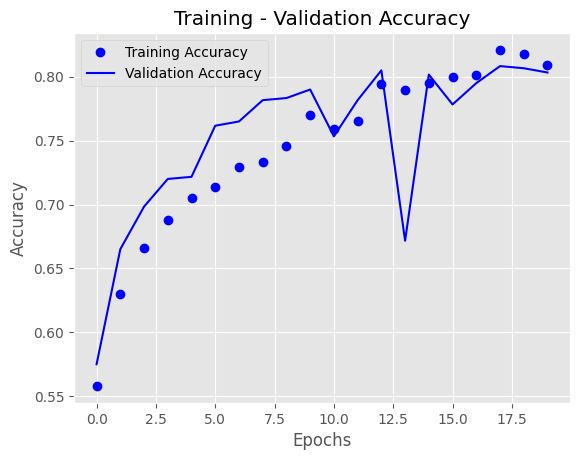

In [48]:
plt.style.use("ggplot")
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training - Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

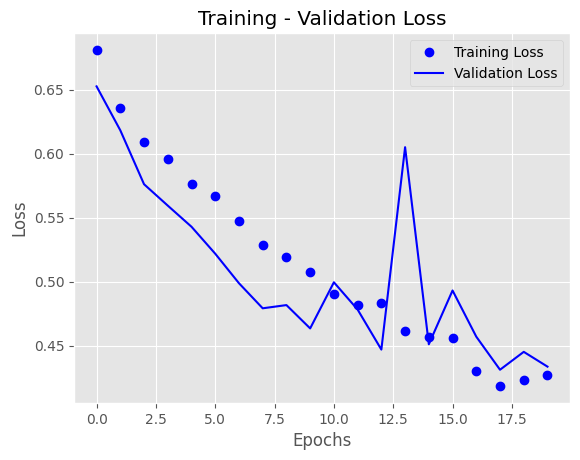

In [50]:
plt.style.use("ggplot")
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training - Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [52]:
#Can say any general case of underfitting or overfitting here, but lets see how
# Data Augmentation changes the accuracy

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = "nearest") #How to fill newly created pixels

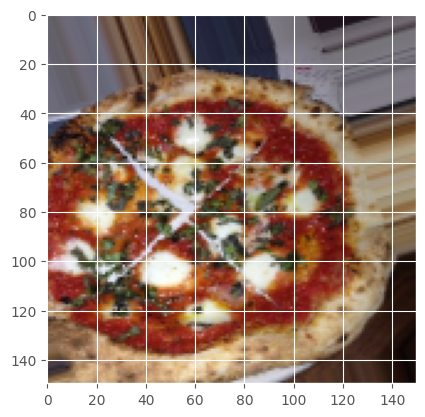

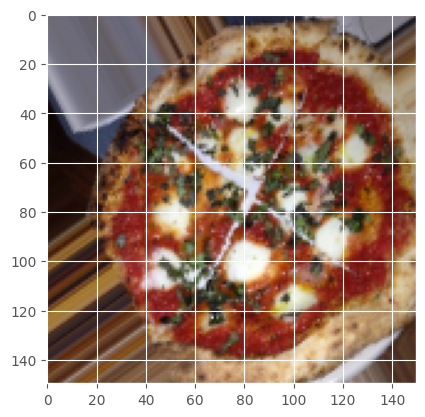

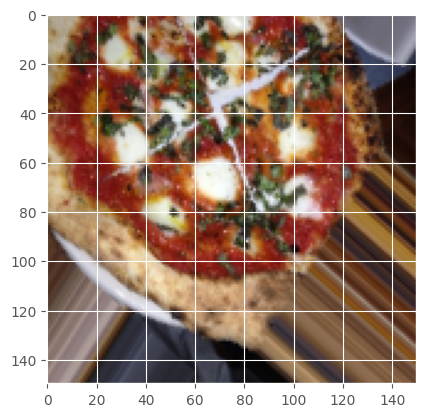

In [73]:
from tensorflow.keras.preprocessing import image

imgs = pizza_images_list[12:16]
files = []
for img in imgs:
    path = os.path.join("pizza_not_pizza", "pizza", img)
    files.append(path)

img_path = files[1]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)    # (1,) + (150,150,3) --> (1, 150, 150,3)

# ImageDataGenerator.flow(x, y, batch_size=1) -> Generate batches of augmented data

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i+1
    if(i%3==0):
        break

* Even though the network will technically not be seeing the same images as they are augmented but the images are still very "closely related". 
* We are not generating completely new information
* Rather mixing and remixing information

In [74]:
# Adding a Dropout layer to decrease the chance of overfitting

model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3))) #I think this is in the new library update
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"])

In [75]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale=1./255)


In [77]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

Found 1000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [78]:
history = model.fit(train_generator,
                    steps_per_epoch=50,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=30)

c:\Users\prish\miniconda3\envs\keras-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
32/50 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - acc: 0.5354 - loss: 0.6921

c:\Users\prish\miniconda3\envs\keras-env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - acc: 0.5340 - loss: 0.6906 - val_acc: 0.5017 - val_loss: 0.6916
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - acc: 0.5660 - loss: 0.6833 - val_acc: 0.6067 - val_loss: 0.6632
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - acc: 0.5760 - loss: 0.6660 - val_acc: 0.6183 - val_loss: 0.6489
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - acc: 0.6190 - loss: 0.6534 - val_acc: 0.6417 - val_loss: 0.6270
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - acc: 0.6380 - loss: 0.6420 - val_acc: 0.6483 - val_loss: 0.6304
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - acc: 0.6320 - loss: 0.6333 - val_acc: 0.6200 - val_loss: 0.6410
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - acc: 0.6570 - loss: 0.6314 - val_acc: 0.6933 - val_loss: 0.5817
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - acc: 0.6640 - loss: 0.6106 - val_acc: 0.7233 - val_loss: 0.5715
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - acc: 0.6720 

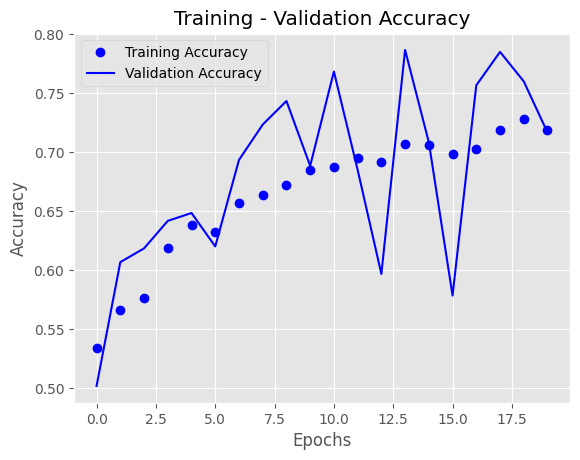

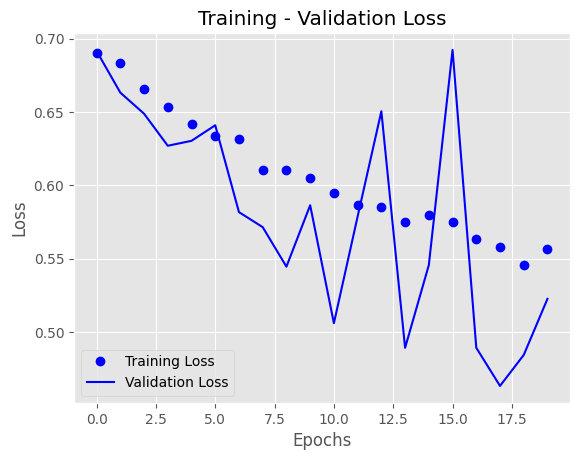

In [79]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]
loss = history.history["loss"]

epochs = range(0, len(acc))

plt.style.use("ggplot")
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training - Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training - Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- Training accuracy overall seems to be a bit lesser than the previous training loops
- Adding dropout and augmentation has done some changes but not to the extent I would have wanted
- Accuracy has lessened but the overall overfitting seems to be getting lesser and I can also say that underfitting might be there, but these are all on the validation sets
- Small dataset size can be a reason for this too

# Pretrained Convnet

- Pretrained Network is a model that has been already trained. Preferably on some other large dataset
- Assuming that the original dataset is large enough and images are general enough then the spatial hierarchy features that the model would have learnt can be used for our task
- The *features* can act as a generic model of the visual world
- Proving useful for new problems -> Even those that are not related to the original problem
- This **portability** of deep learning features makes it so unique and helpful as compared to other statistical methods in shallow learning/ML.
- There are two ways we can look at this use of pretrained convnet -- **Feature Extraction** and **Finetuning**

## Feature Extraction

* Using the representations learned by the previous network to extract spatial features from the new samples.
* Take the _convolutional base_ of the pre trained model to extract features from new samples and train a classification head on top of it
* No point in using the pre trained dense classifer as the representations learnt by it will be only useful to those classes it was trained on and not our own new samples and hence new features.
* Level of generality or reusability depends on which layers. As we go down the layers start extracting more and more class specific features and less general.
* So if our new dataset is very different from the trained one we are better off using the starting layers rather than the deep ones below.

In [22]:
from keras.applications import VGG16
import os

conv_base = VGG16(weights="imagenet",
                  include_top=False,
                  input_shape=(150, 150, 3))

In [23]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
original_dataset_dir = "pizza_not_pizza"
base_dir = "dataset"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")

In [7]:
import os
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

#Looking at the last layer, the extracted features for each sample ll be of the shape (4 4, 512)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = "binary")
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #(batch-size, 4, 4, 512)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i = i+1
        if(i*batch_size >= sample_count):
            break 
    return features, labels 

In [8]:
train_features, train_labels = extract_features(train_dir, 1000)
print("Train dir done")
validation_features, validation_labels = extract_features(val_dir, 600)
print("Val dir done")
test_features, test_labels = extract_features(test_dir, 366)
print("Test dir done")

Found 1000 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 914ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [9]:
# 4x4x512 = 8192
# So we ll flatten the layer from (samples, 4, 4, 512) -> (samples, 8192)
train_features = np.reshape(train_features, (1000, 8192))
test_features = np.reshape(test_features, (366, 8192))
validation_features = np.reshape(validation_features, (600, 8192))

In [24]:
# Using these features we l train our model 

from keras import models 
from keras import layers 
from keras import optimizers

model = models.Sequential()
model.add(layers.Input(shape=(8192,)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,097,665 (8.00 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss = "binary_crossentropy",
              metrics=["acc"])

history = model.fit(train_features, train_labels,
                    epochs = 15,
                    batch_size=32,
                    validation_data=(validation_features, validation_labels))

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.5970 - loss: 0.6798 - val_acc: 0.7933 - val_loss: 0.5477
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.7120 - loss: 0.5610 - val_acc: 0.8150 - val_loss: 0.4713
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.7810 - loss: 0.4810 - val_acc: 0.8450 - val_loss: 0.4268
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.8190 - loss: 0.4269 - val_acc: 0.8450 - val_loss: 0.3974
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8280 - loss: 0.3944 - val_acc: 0.8450 - val_loss: 0.3789
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.8550 - loss: 0.3692 - val_acc: 0.8583 - val_loss: 0.3660
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8440 - loss: 0.3580 - val_acc: 0.8600 - val_loss: 0.3547
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8640 - loss: 0.3282 - val_acc: 0.8583 - val_loss: 0.3536
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8930

In [12]:
model.save("model.keras")

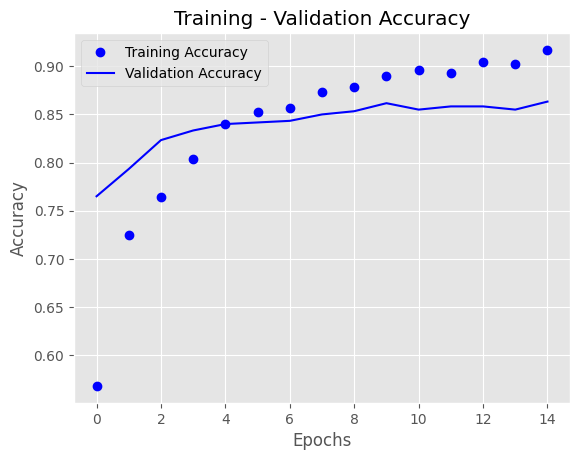

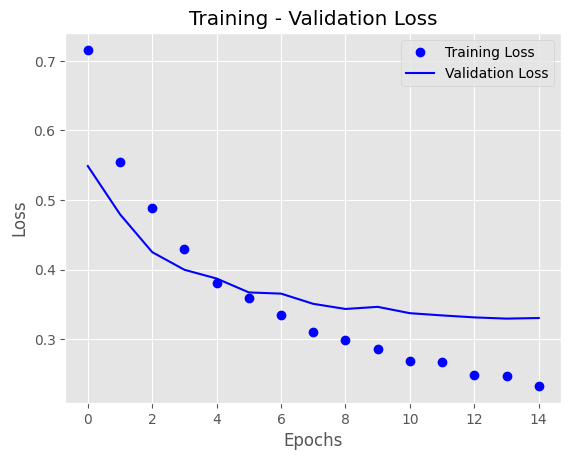

In [35]:
import matplotlib.pyplot as plt 

acc = history.history["acc"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]
loss = history.history["loss"]

epochs = range(0, len(acc))

plt.style.use("ggplot")
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training - Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training - Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Good improvement in training accuracy and loss, but also looks like the fact that there might be some sort of overfitting as we started directly from very high accuracies. Even though expected from these small datasets. Data augmentation can help prevent it.

In [25]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
print("Before freezing conv base number of trainable weights are ", len(model.trainable_weights))
conv_base.trainable = False 
print("After freezing conv_base number of trainable weights are ", len(model.trainable_weights))

Before freezing conv base number of trainable weights are  30
After freezing conv_base number of trainable weights are  4


In [32]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 32,
                                                    class_mode = "binary",
                                                    target_size = (150, 150))
valid_generator = test_datagen.flow_from_directory(val_dir,
                                                    batch_size = 32,
                                                    class_mode = "binary",
                                                    target_size = (150, 150))

Found 1000 images belonging to 2 classes.


Found 600 images belonging to 2 classes.


In [43]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss = "binary_crossentropy",
              metrics=["acc"])

history = model.fit(train_generator,
                    epochs = 15,
                    batch_size=32,
                    validation_data = valid_generator)

c:\Users\Snowwolf\miniconda3\envs\tensf-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - acc: 0.6439 - loss: 0.6487

c:\Users\Snowwolf\miniconda3\envs\tensf-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.6870 - loss: 0.6089 - val_acc: 0.7817 - val_loss: 0.5305
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - acc: 0.7810 - loss: 0.5151 - val_acc: 0.7767 - val_loss: 0.4865
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - acc: 0.7900 - loss: 0.4676 - val_acc: 0.8267 - val_loss: 0.4242
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.8070 - loss: 0.4316 - val_acc: 0.8300 - val_loss: 0.3979
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - acc: 0.8120 - loss: 0.4210 - val_acc: 0.8267 - val_loss: 0.3815
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - acc: 0.8370 - loss: 0.4025 - val_acc: 0.8250 - val_loss: 0.3715
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.8270 - loss: 0.3903 - val_acc: 0.8617 - val_loss: 0.3537
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.8300 - loss: 0.3837 - val_acc: 0.8600 - val_loss: 0.3447
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - acc: 0.8410 - loss: 0.3661 - va

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]
loss = history.history["loss"]

epochs = range(0, len(acc))

plt.style.use("ggplot")
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training - Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training - Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Finetuning 

* Consists of unfreezing few layers on top of the model base used for feature extraction and jointly training the reamining unfrozen layers and thec custom classification layers
* C/d finetuing cause it adjusts the more abstract representations of the model being re-used in order to make them more relevant for the problem at hand.
* We dont want to train more of the feature extraction layers to lose the representation learning made by the original model

In [27]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
#Lets freeze all layers upto block5_conv1

conv_base.trainable = True

set_trainable = False 
for layer in conv_base.layers:
    if(layer.name == "block5_conv1"):
        set_trainable = True 
    if set_trainable:
        layer.trainable = True 
    else:
        layer.trainable = False 

In [30]:
#Train now using a very low learning rate
# We want to limit the magnitude of modifications we are making to the representations of the layers we are finetuning
# Large update may/will harm the representations

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [34]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss = "binary_crossentropy",
              metrics=["acc"])

history = model.fit(train_generator,
                    epochs = 10,
                    batch_size=32,
                    validation_data = valid_generator)

c:\Users\Snowwolf\miniconda3\envs\tensf-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.5881 - loss: 0.6433

c:\Users\Snowwolf\miniconda3\envs\tensf-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - acc: 0.6990 - loss: 0.5492 - val_acc: 0.7933 - val_loss: 0.4647
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - acc: 0.8280 - loss: 0.3891 - val_acc: 0.8500 - val_loss: 0.3604
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - acc: 0.8530 - loss: 0.3456 - val_acc: 0.8600 - val_loss: 0.3222
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - acc: 0.8730 - loss: 0.3047 - val_acc: 0.8750 - val_loss: 0.2964
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - acc: 0.8820 - loss: 0.2935 - val_acc: 0.8700 - val_loss: 0.3281
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - acc: 0.8970 - loss: 0.2523 - val_acc: 0.8883 - val_loss: 0.3174
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - acc: 0.9050 - loss: 0.2409 - val_acc: 0.8983 - val_loss: 0.2754
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - acc: 0.9030 - loss: 0.2365 - val_acc: 0.9033 - val_loss: 0.2597
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - acc: 0.9100 - loss: 0.2206 - va

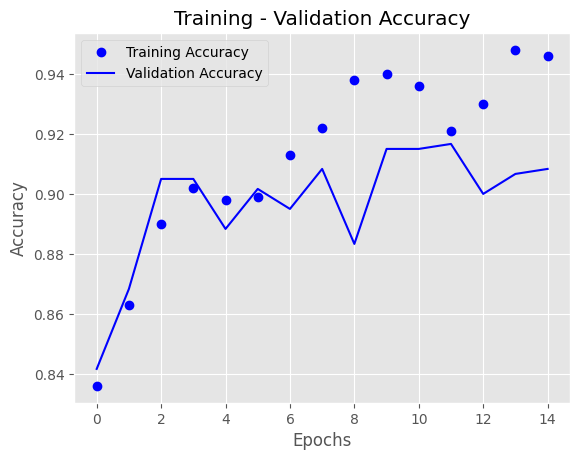

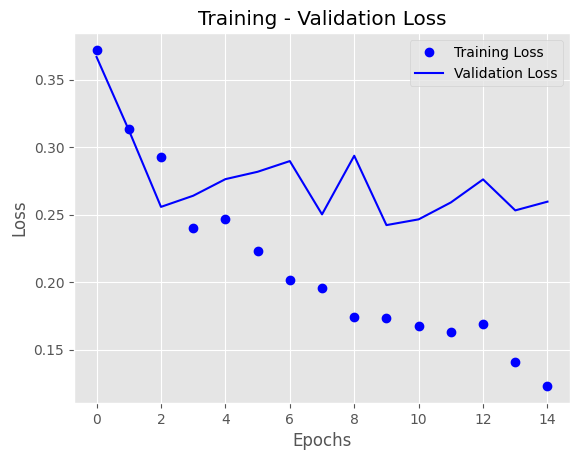

In [50]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]
loss = history.history["loss"]

epochs = range(0, len(acc))

plt.style.use("ggplot")
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training - Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training - Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [35]:
model.save("model1.keras")